<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/UnggyuLee/q3_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,354 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 


data = pd.read_csv("/content/서울시 코로나19 확진자 현황.csv")
locdata = pd.read_csv("/content/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")

print(data)
print(locdata)

        연번     확진일   환자번호  국적  환자정보   지역     여행력        접촉력  조치사항   상태  \
0     5748  10.21.  25530 NaN   NaN  양천구     NaN   감염경로 조사중   NaN  NaN   
1     5747  10.21.  25528 NaN   NaN  강동구     NaN  강남서초 지인모임   NaN  NaN   
2     5746  10.21.  25525 NaN   NaN  강남구     NaN  기타 확진자 접촉   NaN  NaN   
3     5745  10.21.  25517 NaN   NaN  관악구     NaN   감염경로 조사중   NaN  NaN   
4     5744  10.21.  25504 NaN   NaN  관악구     NaN  기타 확진자 접촉   NaN  NaN   
...    ...     ...    ...  ..   ...  ...     ...        ...   ...  ...   
5743     5   1.31.      9 NaN   NaN  성북구     NaN      #5 접촉   NaN   퇴원   
5744     4   1.30.      7 NaN   NaN  마포구  중국 우한시      해외 접촉   NaN   퇴원   
5745     3   1.30.      6 NaN   NaN  종로구     NaN      #3 접촉   NaN   퇴원   
5746     2   1.30.      5 NaN   NaN  중랑구  중국 우한시      해외 접촉   NaN   퇴원   
5747     1   1.24.      2 NaN   NaN  강서구  중국 우한시      해외 접촉   NaN   퇴원   

              이동경로               등록일               수정일 노출여부  
0              NaN  2020-10-22 10:58  2020-10-22 

In [2]:
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


국적, 환자정보, 조치사항은 결측치이므로 제거  

In [3]:
data = data.drop(['국적','환자정보','조치사항'],axis=1)
print(data)
data = data.drop(['등록일','수정일','노출여부','이동경로',],axis=1)
print(data)

        연번     확진일   환자번호   지역     여행력        접촉력   상태          이동경로  \
0     5748  10.21.  25530  양천구     NaN   감염경로 조사중  NaN           NaN   
1     5747  10.21.  25528  강동구     NaN  강남서초 지인모임  NaN           NaN   
2     5746  10.21.  25525  강남구     NaN  기타 확진자 접촉  NaN           NaN   
3     5745  10.21.  25517  관악구     NaN   감염경로 조사중  NaN           NaN   
4     5744  10.21.  25504  관악구     NaN  기타 확진자 접촉  NaN           NaN   
...    ...     ...    ...  ...     ...        ...  ...           ...   
5743     5   1.31.      9  성북구     NaN      #5 접촉   퇴원  이동경로 공개기간 경과   
5744     4   1.30.      7  마포구  중국 우한시      해외 접촉   퇴원  이동경로 공개기간 경과   
5745     3   1.30.      6  종로구     NaN      #3 접촉   퇴원  이동경로 공개기간 경과   
5746     2   1.30.      5  중랑구  중국 우한시      해외 접촉   퇴원  이동경로 공개기간 경과   
5747     1   1.24.      2  강서구  중국 우한시      해외 접촉   퇴원  이동경로 공개기간 경과   

                   등록일               수정일 노출여부  
0     2020-10-22 10:58  2020-10-22 10:58    Y  
1     2020-10-22 10:58  2020-10-22 10:5

지역별 확진자수 시각화

      위치  인원수
0    관악구  452
1    송파구  361
2    성북구  344
3    타시도  331
4    노원구  323
5    강남구  296
6    강서구  295
7    은평구  259
8    동작구  254
9    도봉구  223
10   서초구  210
11   중랑구  201
12  영등포구  200
13   강동구  199
14   구로구  193
15   양천구  186
16   마포구  180
17  동대문구  172
18   강북구  156
19   용산구  140
20   광진구  136
21  서대문구  135
22   성동구  130
23    기타  116
24   금천구   96
25   종로구   94
26    중구   64
27   종랑구    1
28    한국    1


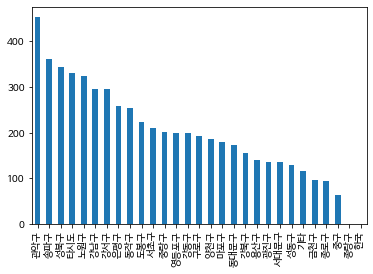

In [4]:
locInf = data['지역'].value_counts()
locInf=locInf.reset_index()
locInf.columns=['위치','인원수']
print(locInf)


data['지역'].value_counts().plot.bar()
plt.show()

In [5]:
import folium

def drawCircle(지역명,인원수):
  if(locDict.get(지역명)==None):
    folium.Circle(
    location=[37.678602,127.237187],
    radius=int(인원수*5),
    color='#2E2EFE', # 원 선 색상
    fill_color='red', # 원 내부 색상
    popup=지역명,
    tooltip=인원수
    ).add_to(m)  
  else :
    folium.Circle(
    location=[locDict[지역명][0],locDict[지역명][1]],
    radius=int(인원수*5),
    color='#FE2E2E', # 원 선 색상
    fill_color='red', # 원 내부 색상
    popup=지역명,
    tooltip=인원수
    ).add_to(m)
'''
locDict
key = 지역의 한글명
value = [위도,경도]
'''
locDict = {}

for i in range(len(locdata['시군구명_한글'])):
  locDict[locdata['시군구명_한글'][i]]=[locdata['위도'][i],locdata['경도'][i]]


m= folium.Map(location=[37.5311,126.9811],zoom_start=10)
for j in range(len(locInf['위치'])):
  drawCircle(locInf['위치'][j],locInf['인원수'][j])

m

인구수가 많은 지역은 감염자도 비례해서 많을 수 있다.  
따라서 감염자수/인구수를 통해 이에 대한 보정을 해주고  
어디서 비례적으로 많은 감염자가 나오는지 알아본다

In [6]:
#2020년 서울시 인구데이터

popData = pd.read_csv("/content/주민등록인구_20230115182716.csv")

print(popData)

print(locInf)


"""
popDataDic
key = 지역명
value = 총 인구수
"""
popDataDic = {}

for i in range(len(popData['동별(2)'])):
  popDataDic[popData['동별(2)'][i]]=popData['2020'][i]
print(popDataDic)




    동별(1)  동별(2)     2020
0   동별(1)  동별(2)        계
1      합계     소계  9911088
2      합계    송파구   673926
3      합계    강서구   585901
4      합계    강남구   544055
5      합계    노원구   527032
6      합계    관악구   509803
7      합계    은평구   484043
8      합계    강동구   463998
9      합계    양천구   457781
10     합계    성북구   447056
11     합계    구로구   432488
12     합계    서초구   429025
13     합계   영등포구   407367
14     합계    동작구   401572
15     합계    중랑구   399562
16     합계    마포구   381858
17     합계    광진구   360109
18     합계   동대문구   357014
19     합계    도봉구   327361
20     합계   서대문구   322952
21     합계    강북구   311569
22     합계    성동구   300505
23     합계    금천구   247835
24     합계    용산구   244645
25     합계    종로구   158996
26     합계     중구   134635
      위치  인원수
0    관악구  452
1    송파구  361
2    성북구  344
3    타시도  331
4    노원구  323
5    강남구  296
6    강서구  295
7    은평구  259
8    동작구  254
9    도봉구  223
10   서초구  210
11   중랑구  201
12  영등포구  200
13   강동구  199
14   구로구  193
15   양천구  186
16   마포구  180
17  동대문구  172
18   강

0.0005269693391691685


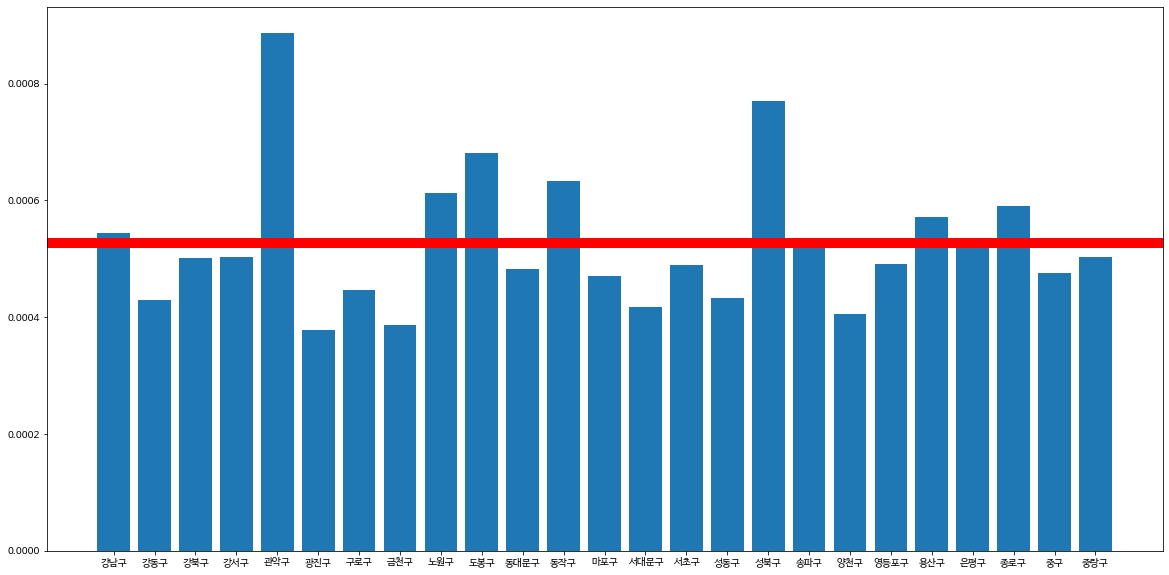

In [31]:

temp = {}
counter=0
tempVal=0
for i in range(len(locInf)):
  if(popDataDic.get(locInf['위치'][i])):
    temp[locInf['위치'][i]]= float(locInf['인원수'][i])/float(popDataDic.get(locInf['위치'][i]))
    counter=counter+1
    tempVal=tempVal+float(locInf['인원수'][i])/float(popDataDic.get(locInf['위치'][i]))

mean = tempVal/counter

print(mean)
temp1 = temp.items()
temp1 = sorted(temp1)
x,y = zip(*temp1)
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.axhline(y=mean,color='r',linewidth=10)
plt.show()